Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_table(r'C:\Users\hp\Desktop\XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

In [5]:
print(data.shape)

(855969, 73)


In [6]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan   

Seperate train and test set

In [8]:

train = data[data['issue_d'] < '2015-6-01']
test = data[data['issue_d'] >= '2015-6-01']

In [9]:
print(train.shape)
print(test.shape)

(598978, 73)
(256991, 73)


# Distribution of loan parameters.

We can see that there is adequate balance between funding and credit. 

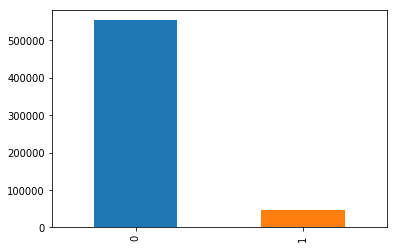

In [10]:
#distribution of dependent variable
train['default_ind'].value_counts().plot.bar()

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total committed by Investors')

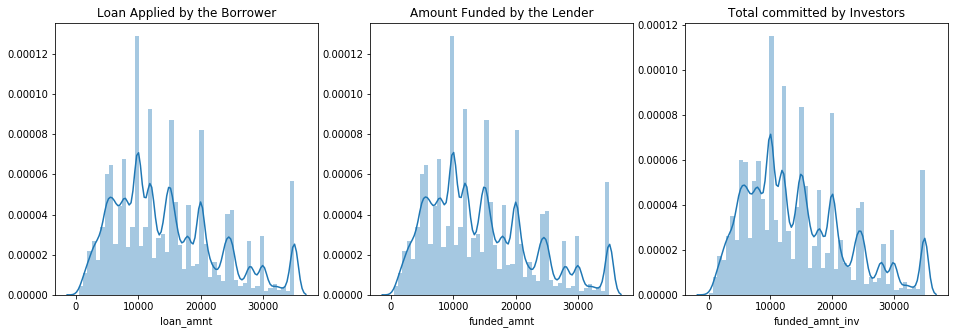

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(train['loan_amnt'], ax=ax[0])
sns.distplot(train['funded_amnt'], ax=ax[1])
sns.distplot(train['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

# Purpose of loan

Debt consolidation stands as a clear winner for loan purposewith 58% of the total.
Following it comes credit card with more than 130k loans(20%) of the total

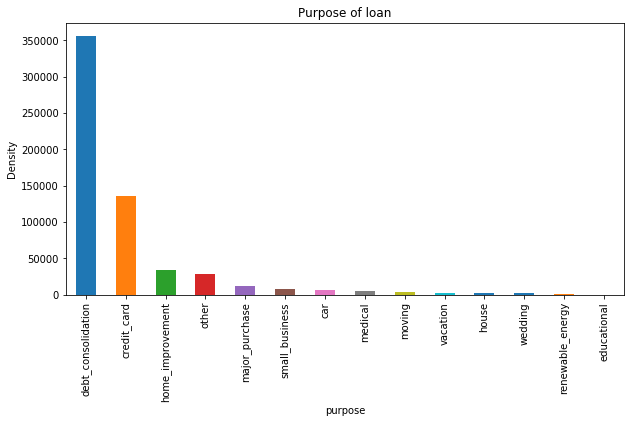

In [12]:
train.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

# Amount of loans issued

We can see that the loans are being issued in an incremental orderand mst loans were issued in 2015.

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


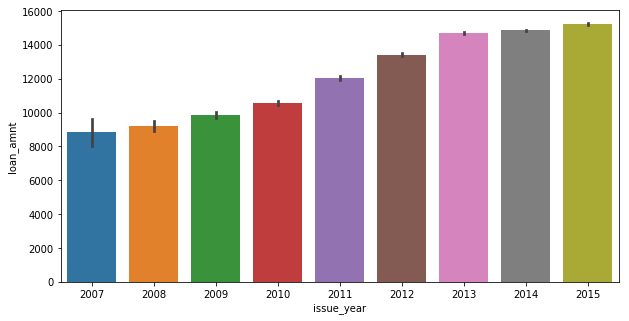

In [13]:

train['issue_year'] = train['issue_d'].dt.year
plt.figure(figsize=(10,5))
sns.barplot(x='issue_year',y='loan_amnt',data=train)

# Loan Status

2014 & 2015 were the best years becausethenon-defaulters were more than defaulters.

Text(0.5,1,'Yearwise Distribution of defaulter')

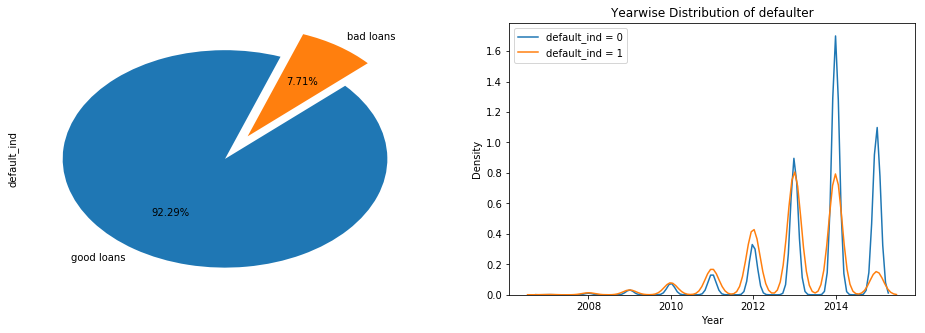

In [14]:
# Loan Status 
fig, ax = plt.subplots(1, 2, figsize=(16,5))
train['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(train.loc[train['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(train.loc[train['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

# Grade

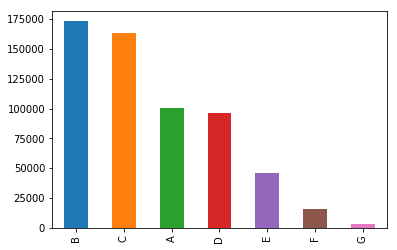

In [15]:
train.grade.value_counts().plot.bar()

(Text(0.5,1,'default_ind=0 vs grade'), Text(0.5,1,'default_ind=1 vs grade'))

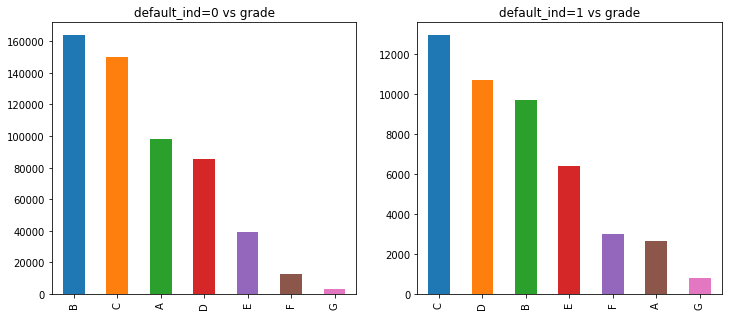

In [16]:
fig,array=plt.subplots(1,2,figsize=(12,5))
train.loc[train['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
train.loc[train['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

In [17]:
print(data.isnull().sum())

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [18]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                              2
grade                             7
sub_grade                        35
emp_title                    290912
emp_length                       11
home_ownership                    6
verification_status               3
pymnt_plan                        2
desc                         120335
purpose                          14
title                         60991
zip_code                        931
addr_state                       51
earliest_cr_line                697
initial_list_status               2
last_pymnt_d                     97
next_pymnt_d                      3
last_credit_pull_d              102
application_type                  2
verification_status_joint         3
dtype: int64

# Percentage of missing values

In [19]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
print(missing_value_data)

                                             column_name  percent_missing
id                                                    id         0.000000
member_id                                      member_id         0.000000
loan_amnt                                      loan_amnt         0.000000
funded_amnt                                  funded_amnt         0.000000
funded_amnt_inv                          funded_amnt_inv         0.000000
term                                                term         0.000000
int_rate                                        int_rate         0.000000
installment                                  installment         0.000000
grade                                              grade         0.000000
sub_grade                                      sub_grade         0.000000
emp_title                                      emp_title         5.776261
emp_length                                    emp_length         5.030673
home_ownership                        

Dropping columns whose missing values were more than 40%

In [21]:
data.drop(['inq_last_12m','total_cu_tl','inq_fi','all_util','max_bal_bc','open_rv_24m','open_rv_12m',
           'il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m',
           'open_acc_6m','verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog',
           'mths_since_last_record','desc','title','zip_code','emp_title','earliest_cr_line','mths_since_last_delinq','last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [22]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [23]:
print(data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                   

In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 45 columns):
id                            855969 non-null int64
member_id                     855969 non-null int64
loan_amnt                     855969 non-null float64
funded_amnt                   855969 non-null float64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
sub_grade                     855969 non-null object
emp_length                    812908 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null datetime64[ns]
pymnt_plan                    855969 non-null object
purpose                      

In [25]:
#Replacing NA with mode
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)#inplace true will make changes permanent

In [26]:
#Replacing NA with mode
colname1=['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
for x in colname1:
    data[x].fillna(data[x].mean(),inplace=True)#inplace true will make changes permanent

In [27]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0.00,171.62,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,1.11,119.66,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0.00,649.91,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0.00,357.48,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0.00,67.79,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,0


In [28]:
#dropping na rows
data.dropna(axis=0,inplace=True)


In [29]:
print(data.isnull().sum())

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [30]:
#converting categorical to numerical
from sklearn import preprocessing
colname=['term','grade','sub_grade','home_ownership','verification_status','pymnt_plan']
le={}

for x in colname:
    le[x]=preprocessing.LabelEncoder()
    
for x in colname:
    data[x]=le[x].fit_transform(data[x])

In [31]:
colname1=['addr_state','application_type']
for x in colname1:
    
    data[x] = pd.get_dummies(data[x])


In [32]:
data.shape


(855467, 45)

In [33]:
data.drop(['emp_length','purpose','initial_list_status'],axis=1,inplace=True)

In [34]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,...,0.00,171.62,0.0,1.0,1,0.0,225.412882,139766.247529,32163.574526,0
1,1077430,1314167,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,...,1.11,119.66,0.0,1.0,1,0.0,225.412882,139766.247529,32163.574526,1
2,1077175,1313524,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,...,0.00,649.91,0.0,1.0,1,0.0,225.412882,139766.247529,32163.574526,0
3,1076863,1277178,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,...,0.00,357.48,0.0,1.0,1,0.0,225.412882,139766.247529,32163.574526,0
4,1075358,1311748,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,...,0.00,67.79,0.0,1.0,1,0.0,225.412882,139766.247529,32163.574526,0


In [36]:
train_df = data[data['issue_d'] < '2015-6-01']
test_df = data[data['issue_d'] >= '2015-6-01']

In [37]:
data.drop('issue_d',inplace=True,axis=1)

In [38]:
len(train_df)

598581

In [39]:
train_data=data.loc[0:len(train_df),:]
test_data=data.loc[len(train_df):,:]

In [40]:
X_train=train_data.values[:,:-1]
Y_train=train_data.values[:,-1]
X_test=test_data.values[:,:-1]
Y_test=test_data.values[:,-1]

In [41]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print('classification report:')

print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)


[[254045     86]
 [   760   2395]]
classification report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    254131
        1.0       0.97      0.76      0.85      3155

avg / total       1.00      1.00      1.00    257286

Accuracy of the model: 0.9967118304144027


In [45]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,n_estimators=1000,min_samples_leaf=3)
m.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:

y_pred = m.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
acc=accuracy_score(Y_test,y_pred)
print("Accuracy of the model:",acc)

[[254097     34]
 [   397   2758]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    254131
        1.0       0.99      0.87      0.93      3155

avg / total       1.00      1.00      1.00    257286

Accuracy of the model: 0.9983248214049735
